In [3]:
%load_ext autoreload
%autoreload 2

import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#IMPORTANT: REPLACE WITH YOUR PATH TO THE RULE-VETTING GITHUB
repo_path = '/users/jbbutler129/Google Drive (butlerj@berkeley.edu)/Classes/215A/final_project/rule-vetting/'
sys.path.insert(1, repo_path)

import rulevetting.api.viz as viz
from rulevetting.projects.tbi_pecarn.dataset import Dataset

outcome_def = 'outcome'  # output
%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading the TBI Data

In [41]:
# couldn't figure out how to do this, so I'm going to just load up the csvs on my own

#path = '/users/jbbutler129/Google Drive (butlerj@berkeley.edu)/Classes/215A/rule-vetting/rulevetting/projects/tbi_pecarn'
#df_train, df_tune, _ = Dataset().get_data(load_csvs=True, data_path = path)



In [5]:
# this is me loading up the main CSV on my own
tbi_df = pd.read_csv(repo_path + '/data/tbi_pecarn/raw/TBI PUD 10-08-2013.csv')

# Feature Examination

Looking at the features, we see many variables a probably have nothing to do with TBIs
(employee type, certification, etc.)
Some of these also have overlapping information, so let's try to get a subset of these predictors and then look at the correlations


In [7]:
features = tbi_df.keys().tolist()
features

['PatNum',
 'EmplType',
 'Certification',
 'InjuryMech',
 'High_impact_InjSev',
 'Amnesia_verb',
 'LOCSeparate',
 'LocLen',
 'Seiz',
 'SeizOccur',
 'SeizLen',
 'ActNorm',
 'HA_verb',
 'HASeverity',
 'HAStart',
 'Vomit',
 'VomitNbr',
 'VomitStart',
 'VomitLast',
 'Dizzy',
 'Intubated',
 'Paralyzed',
 'Sedated',
 'GCSEye',
 'GCSVerbal',
 'GCSMotor',
 'GCSTotal',
 'GCSGroup',
 'AMS',
 'AMSAgitated',
 'AMSSleep',
 'AMSSlow',
 'AMSRepeat',
 'AMSOth',
 'SFxPalp',
 'SFxPalpDepress',
 'FontBulg',
 'SFxBas',
 'SFxBasHem',
 'SFxBasOto',
 'SFxBasPer',
 'SFxBasRet',
 'SFxBasRhi',
 'Hema',
 'HemaLoc',
 'HemaSize',
 'Clav',
 'ClavFace',
 'ClavNeck',
 'ClavFro',
 'ClavOcc',
 'ClavPar',
 'ClavTem',
 'NeuroD',
 'NeuroDMotor',
 'NeuroDSensory',
 'NeuroDCranial',
 'NeuroDReflex',
 'NeuroDOth',
 'OSI',
 'OSIExtremity',
 'OSICut',
 'OSICspine',
 'OSIFlank',
 'OSIAbdomen',
 'OSIPelvis',
 'OSIOth',
 'Drugs',
 'CTForm1',
 'IndAge',
 'IndAmnesia',
 'IndAMS',
 'IndClinSFx',
 'IndHA',
 'IndHema',
 'IndLOC',
 'In

This is me removing all of the traumatic finding variables/extraneous variables that indicate a TBI by definition

In [8]:
cols_rem = tbi_df.drop(tbi_df.columns[list(np.arange(95, 124)) + [1,2]], axis = 1)

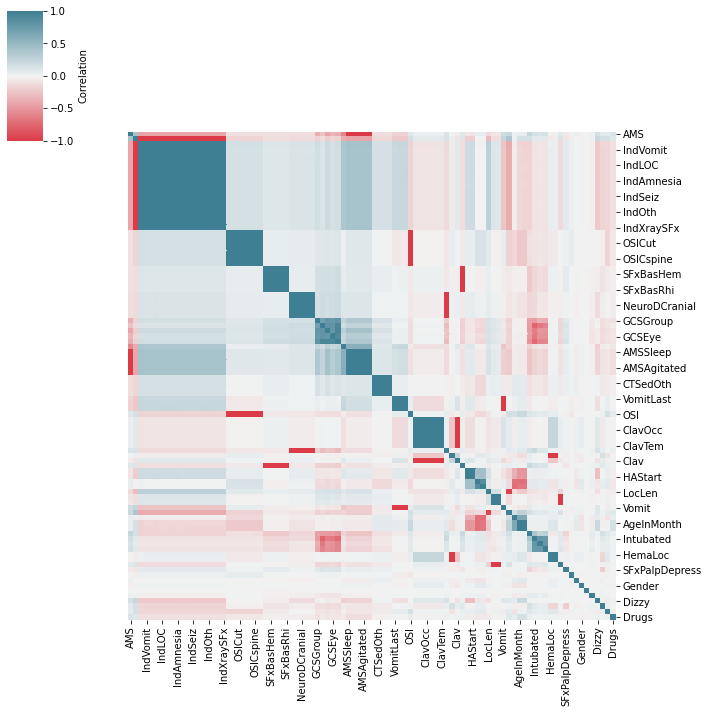

In [12]:
corrmap = sns.clustermap(cols_rem.corr(), cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
corrmap.ax_row_dendrogram.set_visible(False)
corrmap.ax_col_dendrogram.set_visible(False)


Seems like I might want to also remove all of the 'IND' variables, since those don't really indicate anything about whether or not you're going to have a TBI (reasons why you're ordering a CT scan), not really helpful for our problem because we're making classifiers to make sure individuals don't get unnecessary CT scans: an individual classified using our classifier will not have had a CT scan yet, so we wouldn't have that data anyway

In [13]:
# making a list of variables to remove
list_to_rem = []

for name in cols_rem.keys().tolist():
    
    if 'Ind' in name or 'CT' in name:
        list_to_rem.append(name)



In [14]:
# these are the variables I'm removing, since these aren't super helpful for our purposes
list_to_rem

['CTForm1',
 'IndAge',
 'IndAmnesia',
 'IndAMS',
 'IndClinSFx',
 'IndHA',
 'IndHema',
 'IndLOC',
 'IndMech',
 'IndNeuroD',
 'IndRqstMD',
 'IndRqstParent',
 'IndRqstTrauma',
 'IndSeiz',
 'IndVomit',
 'IndXraySFx',
 'IndOth',
 'CTSed',
 'CTSedAgitate',
 'CTSedAge',
 'CTSedRqst',
 'CTSedOth']

Let's take these columns and remove them!

In [15]:
cols_rem2 = cols_rem.drop(list_to_rem, axis = 1)

Now, let's replot and see what we get!

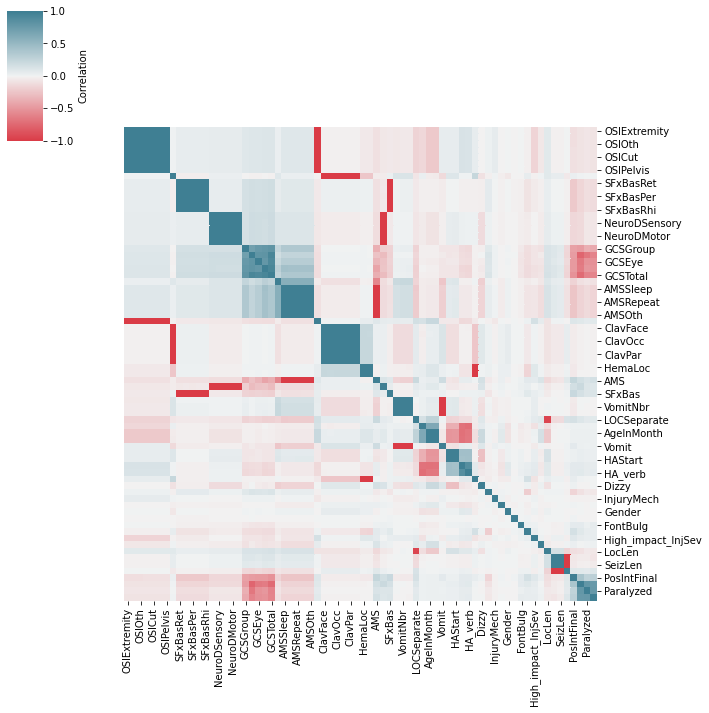

In [16]:
corrmap = sns.clustermap(cols_rem2.corr(), cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
corrmap.ax_row_dendrogram.set_visible(False)
corrmap.ax_col_dendrogram.set_visible(False)

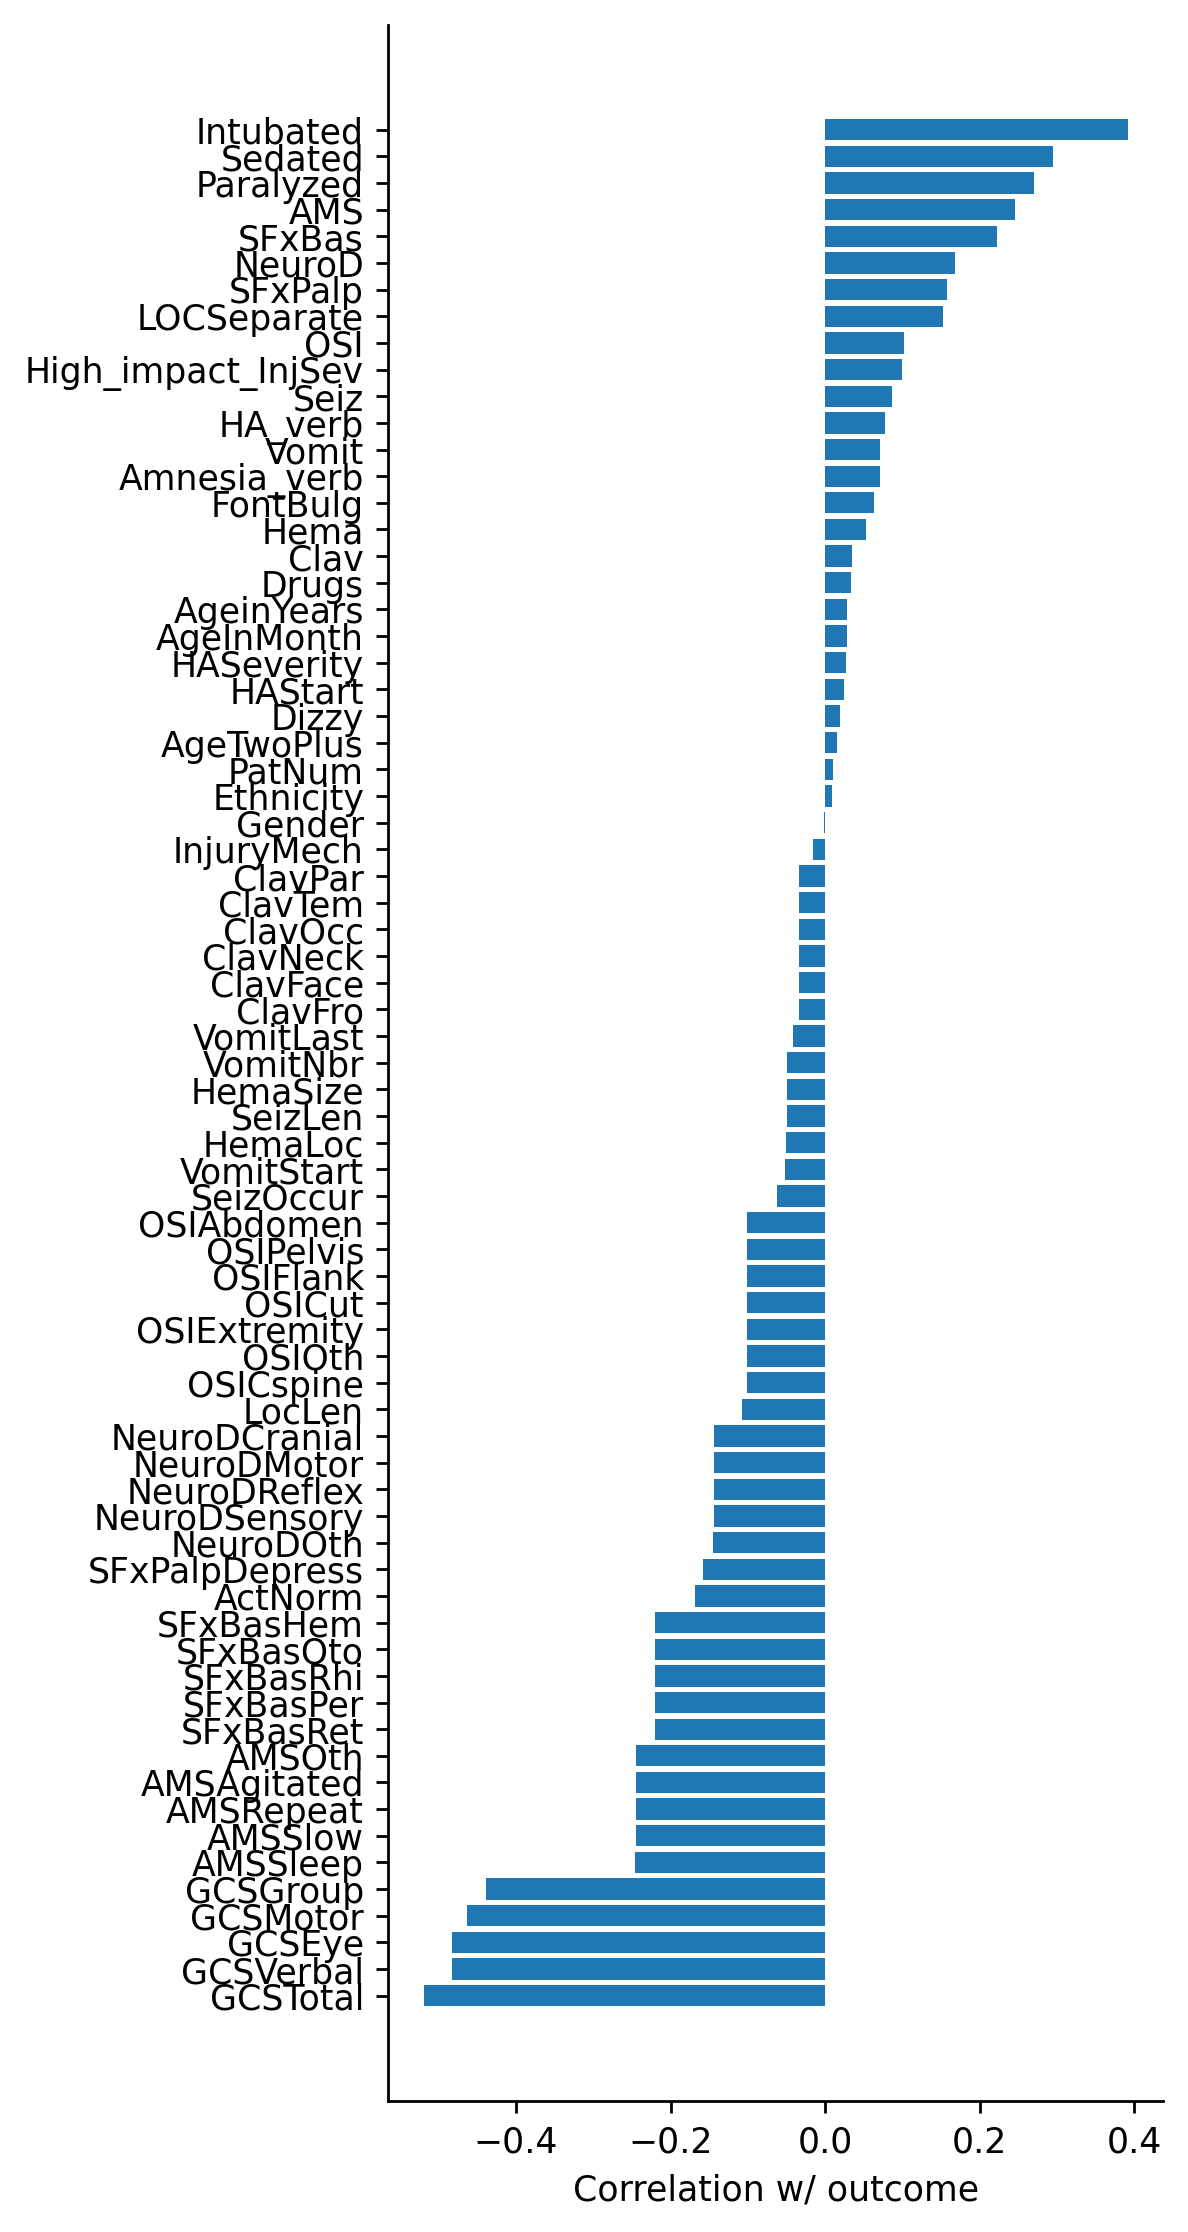

In [81]:
corrs = cols_rem2.corr()

plt.figure(dpi=250, figsize=(4, 11))
vals = corrs['PosIntFinal']
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[:-1], vals[args][:-1])
plt.xlabel('Correlation w/ outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

It seems like the GCS Scores are highly correlated with the outcome (whether or not you have a defined TBI), Correlation does not mean causation!

Seems like 3/4 of the dataset has missing values (upon reading further, this makes sense)

In [30]:
len(tbi_df_no_nan.index)

10529

In [31]:
len(tbi_df.index)

43399

ValueError: The condensed distance matrix must contain only finite values.

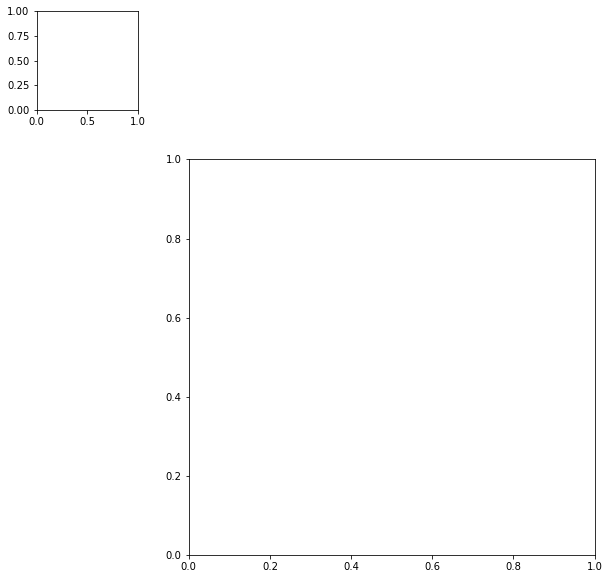

In [45]:
feat

['PatNum',
 'EmplType',
 'Certification',
 'InjuryMech',
 'High_impact_InjSev',
 'Amnesia_verb',
 'LOCSeparate',
 'LocLen',
 'Seiz',
 'SeizOccur',
 'SeizLen',
 'ActNorm',
 'HA_verb',
 'HASeverity',
 'HAStart',
 'Vomit',
 'VomitNbr',
 'VomitStart',
 'VomitLast',
 'Dizzy',
 'Intubated',
 'Paralyzed',
 'Sedated',
 'GCSEye',
 'GCSVerbal',
 'GCSMotor',
 'GCSTotal',
 'GCSGroup',
 'AMS',
 'AMSAgitated',
 'AMSSleep',
 'AMSSlow',
 'AMSRepeat',
 'AMSOth',
 'SFxPalp',
 'SFxPalpDepress',
 'FontBulg',
 'SFxBas',
 'SFxBasHem',
 'SFxBasOto',
 'SFxBasPer',
 'SFxBasRet',
 'SFxBasRhi',
 'Hema',
 'HemaLoc',
 'HemaSize',
 'Clav',
 'ClavFace',
 'ClavNeck',
 'ClavFro',
 'ClavOcc',
 'ClavPar',
 'ClavTem',
 'NeuroD',
 'NeuroDMotor',
 'NeuroDSensory',
 'NeuroDCranial',
 'NeuroDReflex',
 'NeuroDOth',
 'OSI',
 'OSIExtremity',
 'OSICut',
 'OSICspine',
 'OSIFlank',
 'OSIAbdomen',
 'OSIPelvis',
 'OSIOth',
 'Drugs',
 'CTForm1',
 'IndAge',
 'IndAmnesia',
 'IndAMS',
 'IndClinSFx',
 'IndHA',
 'IndHema',
 'IndLOC',
 'In